# IBMz

# DISCUSSIONS:

1. Find out how many images we have of a particular dimension then make a bucket of specific size of images.

2. Try to handle and identify the outliers and then train the model.

3. Converting RGB to BGR to maintain uniformity.

4. Do the preprocessing in a sequential way.

Like:
Gaussian blurring, thresholding, Sharpen technique, findContours, Adaptive gaussian thresholding + more..

5. Apply Data Augmentation and save those images in real-time immediately after data augmentation.

6. Do image preprocessing in sequence and save the output. Do it individually like do it for one image and do all this techniques on that.

7. Normalize the image.

# Tasks Completed in this Notebook:

1. Using Models VGG 16, VGG 19, Resnet and EfficientNet
2. Construction of confusion matrix
3. Apply Preprocessing Technique and try build one model each on normal, sharpened, threshold, adaptive_threshold and gaussian blur.
4. Get the precision, get recall, Training accuracy, Validation accuracy
5. Use 60-30 and do 10 images for the blind set and perform image normalization.
6. Perform data augmentation on the fly during the model training itself to save time.


# Step 1: Importing Required Modules

In [ ]:
import os
import numpy as np
import os
import cv2
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 2: Importing and preparing dataset

In [ ]:
dir_path = '/content/drive/MyDrive/IBMz datathon/NEXT LEVEL/Images'

# Get list of image file names in the directory
file_names = os.listdir(dir_path)

print("The classes of fracture:")
for i in range(len(file_names)):
    print(i+1,file_names[i])

The classes of fracture:
1 Greenstick fracture
2 Fracture Dislocation
3 Longitudinal fracture
4 Avulsion fracture
5 Impacted fracture
6 Pathological fracture
7 Spiral Fracture
8 Hairline Fracture
9 Intra-articular fracture
10 Compression-Crush fracture
11 Oblique fracture
12 Comminuted fracture


## dataset_1 = Gathering all Images of size lesser than 500x500

In [ ]:
dir_path = '/content/drive/MyDrive/IBMz datathon/NEXT LEVEL/Images'

# Create directories to store the two datasets
os.makedirs('dataset_1', exist_ok=True)

# Loop through each subdirectory and copy images within 500 x 500 to dataset 1
for subdir_name in os.listdir(dir_path):
    subdir_path = os.path.join(dir_path, subdir_name)
    for file_name in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, file_name)
        with Image.open(file_path) as img:
            width, height = img.size
            if width <= 500 and height <= 500:
                dest_path = os.path.join('dataset_1', subdir_name)
                os.makedirs(dest_path, exist_ok=True)
                shutil.copy2(file_path, dest_path)


In [ ]:
dir_path = 'dataset_1'

subdir_names = os.listdir(dir_path)

for subdir_name in subdir_names:
    subdir_path = os.path.join(dir_path, subdir_name)
    file_names = os.listdir(subdir_path)
    num_files = len(file_names)
    print(f"{subdir_name}: {num_files} images")


Intra-articular fracture: 59 images
Oblique fracture: 61 images
Longitudinal fracture: 71 images
Pathological fracture: 67 images
Spiral Fracture: 76 images
Comminuted fracture: 162 images
Impacted fracture: 100 images
Hairline Fracture: 81 images
Avulsion fracture: 80 images
Compression-Crush fracture: 97 images
Greenstick fracture: 69 images
Fracture Dislocation: 81 images


## dataset_1_bgr = Convert Images from RGB to BGR

In [ ]:
# Path to the original dataset folder
input_folder = 'dataset_1'

# Path to the output folder
output_folder = 'dataset_1_bgr'

# Walk through all subfolders and files in the input folder
for root, dirs, files in os.walk(input_folder):
    # Create corresponding subdirectories in the output folder
    for dir in dirs:
        os.makedirs(os.path.join(output_folder, root, dir), exist_ok=True)
    # Convert each image file in the current folder to BGR and save to the output folder
    for file in files:
            # Load the image
            img = cv2.imread(os.path.join(root, file))
            # Convert to BGR
            try:
              img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
              # Save to the output folder
              cv2.imwrite(os.path.join(output_folder, root, file), img_bgr)
            except:
              print('Error')


Error
Error


## Resizing the images to 224x224 for All Models

In [ ]:
# Path to the original dataset folder
input_folder = './dataset_1_bgr/dataset_1'

# Path to the output folder
output_folder = 'dataset-Normal'

# Target size of the images
target_size = (224, 224)

# Walk through all subfolders and files in the input folder
for root, dirs, files in os.walk(input_folder):
    # Create corresponding subdirectories in the output folder
    for dir in dirs:
        os.makedirs(os.path.join(output_folder, root, dir), exist_ok=True)
    # Resize each image file in the current folder and save to the output folder
    for file in files:
        # Load the image
        img = cv2.imread(os.path.join(root, file))
        # Resize the image to the target size
        img_resized = cv2.resize(img, target_size)
        # Save to the output folder
        cv2.imwrite(os.path.join(output_folder, root, file), img_resized)


Now we apply models for all different Pre-processing methods.
1. Normal  - Normal-Use
2. Sharpened - Sharpened
3. Threshold - Thresholded
4. Adaptive Threshold - Adaptive-Thresholded
5. Guassian Blur

# Preparing - Normal Dataset

In [ ]:
# Set the path to the original dataset folder
input_folder = 'dataset-Normal/dataset_1_bgr/dataset_1'

# Set the paths to the folders where the split images will be saved
train_folder = "Normal-Use-Train"
test_folder = "Normal-Use-Test"
blind_set_folder = "Normal-Use-BlindSet"

# Create the output directories
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(blind_set_folder, exist_ok=True)

# Define the percentages for each set
train_pct = 0.6
test_pct = 0.3
blind_set_pct = 0.1

# Walk through all subfolders and files in the input folder
for root, dirs, files in os.walk(input_folder):
    # Create corresponding subdirectories in the output folders
    for dir in dirs:
        os.makedirs(os.path.join(train_folder, root, dir), exist_ok=True)
        os.makedirs(os.path.join(test_folder, root, dir), exist_ok=True)
        os.makedirs(os.path.join(blind_set_folder, root, dir), exist_ok=True)

        # Collect all the images in the current folder
        images = []
        for file in os.listdir(os.path.join(root, dir)):
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                images.append(file)

        # Split the images into train, test, and blind sets
        num_images = len(images)
        train_count = int(num_images * train_pct)
        test_count = int(num_images * test_pct)
        blind_set_count = int(num_images * blind_set_pct)

        train_images = images[:train_count]
        test_images = images[train_count:train_count+test_count]
        blind_set_images = images[train_count+test_count:train_count+test_count+blind_set_count]

        # Move the images to the appropriate output folders
        for file in train_images:
            src_file = os.path.join(root, dir, file)
            dst_file = os.path.join(train_folder, root, dir, file)
            os.rename(src_file, dst_file)

        for file in test_images:
            src_file = os.path.join(root, dir, file)
            dst_file = os.path.join(test_folder, root, dir, file)
            os.rename(src_file, dst_file)

        for file in blind_set_images:
            src_file = os.path.join(root, dir, file)
            class_name = os.path.basename(root)  # Get the class name from the current folder
            dst_file = os.path.join(blind_set_folder, root, dir, f"{class_name}_{file}")
            os.rename(src_file, dst_file)

# Other Code


In [ ]:
# Set the paths to the train, test, and blind set folders
train_folder = "Normal-Use-Train"
test_folder = "Normal-Use-Test"
blind_set_folder = "Normal-Use-BlindSet"

# Walk through all subfolders and files in the train folder and count the number of images
print("Train set:")
for root, dirs, files in os.walk(train_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

# Walk through all subfolders and files in the test folder and count the number of images
print("\nTest set:")
for root, dirs, files in os.walk(test_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

# Walk through all subfolders and files in the blind set folder and count the number of images
print("\nBlind set:")
for root, dirs, files in os.walk(blind_set_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

Train set:
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Intra-articular fracture: 35 images
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Oblique fracture: 36 images
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Longitudinal fracture: 42 images
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Pathological fracture: 40 images
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Spiral Fracture: 45 images
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Comminuted fracture: 97 images
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Impacted fracture: 60 images
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Hairline Fracture: 48 images
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Avulsion fracture: 48 images
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Compression-Crush fracture: 58 images
Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1/Greenstick fracture: 41 images
Normal-Use-Train/dataset-Norm

# Preparing - Sharpened Dataset:

In [ ]:
# Set the path to the original dataset folder
input_folder = 'dataset-Normal/dataset_1_bgr/dataset_1'

# Set the paths to the folders where the split images will be saved
train_folder = "Sharpened-Train"
test_folder = "Sharpened-Test"
blind_set_folder = "Sharpened-BlindSet"


# Create the output directories
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(blind_set_folder, exist_ok=True)

# Define the percentages for each set
train_pct = 0.6
test_pct = 0.3
blind_set_pct = 0.1

# Walk through all subfolders and files in the input folder
for root, dirs, files in os.walk(input_folder):
    # Create corresponding subdirectories in the output folders
    for dir in dirs:
        os.makedirs(os.path.join(train_folder, root, dir), exist_ok=True)
        os.makedirs(os.path.join(test_folder, root, dir), exist_ok=True)
        os.makedirs(os.path.join(blind_set_folder, root, dir), exist_ok=True)

        # Collect all the images in the current folder
        images = []
        for file in os.listdir(os.path.join(root, dir)):
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                images.append(file)

        # Split the images into train, test, and blind sets
        num_images = len(images)
        train_count = int(num_images * train_pct)
        test_count = int(num_images * test_pct)
        blind_set_count = int(num_images * blind_set_pct)

        train_images = images[:train_count]
        test_images = images[train_count:train_count+test_count]
        blind_set_images = images[train_count+test_count:train_count+test_count+blind_set_count]

        # Move the images to the appropriate output folders
        for file in train_images:
            src_file = os.path.join(root, dir, file)
            img = cv2.imread(src_file)
            kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]], dtype=np.float32)  # Define the kernel for sharpening
            sharpened_img = cv2.filter2D(img, -1, kernel)
            # Save the sharpened image to the output test folder
            dst_file = os.path.join(train_folder, root, dir, file)
            cv2.imwrite(dst_file, sharpened_img)

        for file in test_images:
            try:
              img = cv2.imread(os.path.join(root,dir,file))
              kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]], dtype=np.float32)  # Define the kernel for sharpening
              sharpened_img = cv2.filter2D(img, -1, kernel)
              # Save the sharpened image to the output test folder
              output_file = os.path.join(test_folder, root,dir,file)
              cv2.imwrite(output_file,sharpened_img)
            except:
              print("error")

        for file in blind_set_images:
            src_file = os.path.join(root, dir, file)
            img = cv2.imread(src_file)
            kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]], dtype=np.float32)  # Define the kernel for sharpening
            sharpened_img = cv2.filter2D(img, -1, kernel)
            # Save the sharpened image to the output test folder
            output_file = os.path.join(blind_set_folder, root,dir,file)
            cv2.imwrite(output_file,sharpened_img)


#Other Code

In [ ]:
# Set the paths to the train, test, and blind set folders
train_folder = "Sharpened-Train"
test_folder = "Sharpened-Test"
blind_set_folder = "Sharpened-BlindSet"

# Walk through all subfolders and files in the train folder and count the number of images
print("Train set:")
for root, dirs, files in os.walk(train_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

# Walk through all subfolders and files in the test folder and count the number of images
print("\nTest set:")
for root, dirs, files in os.walk(test_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

# Walk through all subfolders and files in the blind set folder and count the number of images
print("\nBlind set:")
for root, dirs, files in os.walk(blind_set_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

Train set:
Sharpened-Train/dataset-Normal/dataset_1_bgr/dataset_1/Intra-articular fracture: 1 images
Sharpened-Train/dataset-Normal/dataset_1_bgr/dataset_1/Spiral Fracture: 1 images
Sharpened-Train/dataset-Normal/dataset_1_bgr/dataset_1/Greenstick fracture: 1 images

Test set:

Blind set:


# Preparing - Thresholded Dataset:

In [ ]:
# Set the path to the original dataset folder
input_folder = 'dataset-Normal/dataset_1_bgr/dataset_1'

# Set the paths to the folders where the split images will be saved
train_folder = "Thresholded-Train"
test_folder = "Thresholded-Test"
blind_set_folder = "Thresholded-BlindSet"


# Create the output directories
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(blind_set_folder, exist_ok=True)

# Define the percentages for each set
train_pct = 0.6
test_pct = 0.3
blind_set_pct = 0.1

# Walk through all subfolders and files in the input folder
for root, dirs, files in os.walk(input_folder):
    # Create corresponding subdirectories in the output folders
    for dir in dirs:
        os.makedirs(os.path.join(train_folder, root, dir), exist_ok=True)
        os.makedirs(os.path.join(test_folder, root, dir), exist_ok=True)
        os.makedirs(os.path.join(blind_set_folder, root, dir), exist_ok=True)

        # Collect all the images in the current folder
        images = []
        for file in os.listdir(os.path.join(root, dir)):
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                images.append(file)

        # Split the images into train, test, and blind sets
        num_images = len(images)
        train_count = int(num_images * train_pct)
        test_count = int(num_images * test_pct)
        blind_set_count = int(num_images * blind_set_pct)

        train_images = images[:train_count]
        test_images = images[train_count:train_count+test_count]
        blind_set_images = images[train_count+test_count:train_count+test_count+blind_set_count]

        # Move the images to the appropriate output folders
        for file in train_images:
            src_file = os.path.join(root, dir, file)
            img = cv2.imread(src_file, cv2.IMREAD_GRAYSCALE)
            threshold = 127  # Set the threshold value
            _, threshold_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
            dst_file = os.path.join(train_folder, root, dir, file)
            cv2.imwrite(dst_file, threshold_img)

        for file in test_images:
            src_file = os.path.join(root, dir, file)
            img = cv2.imread(src_file, cv2.IMREAD_GRAYSCALE)
            threshold = 127  # Set the threshold value
            _, threshold_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
            dst_file = os.path.join(test_folder, root, dir, file)
            cv2.imwrite(dst_file, threshold_img)

        for file in blind_set_images:
            src_file = os.path.join(root, dir, file)
            img = cv2.imread(src_file, cv2.IMREAD_GRAYSCALE)
            threshold = 127  # Set the threshold value
            _, threshold_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
            dst_file = os.path.join(blind_set_folder, root, dir, file)
            cv2.imwrite(dst_file, threshold_img)


# Other

In [ ]:
# Set the paths to the train, test, and blind set folders
train_folder = "Thresholded-Train"
test_folder = "Thresholded-Test"
blind_set_folder = "Thresholded-BlindSet"

# Walk through all subfolders and files in the train folder and count the number of images
print("Train set:")
for root, dirs, files in os.walk(train_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

# Walk through all subfolders and files in the test folder and count the number of images
print("\nTest set:")
for root, dirs, files in os.walk(test_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

# Walk through all subfolders and files in the blind set folder and count the number of images
print("\nBlind set:")
for root, dirs, files in os.walk(blind_set_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

Train set:
Thresholded-Train/dataset-Normal/dataset_1_bgr/dataset_1/Intra-articular fracture: 1 images
Thresholded-Train/dataset-Normal/dataset_1_bgr/dataset_1/Spiral Fracture: 1 images
Thresholded-Train/dataset-Normal/dataset_1_bgr/dataset_1/Greenstick fracture: 1 images

Test set:

Blind set:


# Preparing - Adaptive Threshold Dataset

In [ ]:
block_size = 15
constant_value = 2

# Set the path to the original dataset folder
input_folder = 'dataset-Normal/dataset_1_bgr/dataset_1'

# Set the paths to the folders where the split images will be saved
train_folder = "Adaptive-Thresholded-Train"
test_folder = "Adaptive-Thresholded-Test"
blind_set_folder = "Adaptive-Thresholded-BlindSet"



# Create the output directories
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(blind_set_folder, exist_ok=True)

# Define the percentages for each set
train_pct = 0.6
test_pct = 0.3
blind_set_pct = 0.1

# Walk through all subfolders and files in the input folder
for root, dirs, files in os.walk(input_folder):
    # Create corresponding subdirectories in the output folders
    for dir in dirs:
        os.makedirs(os.path.join(train_folder, root, dir), exist_ok=True)
        os.makedirs(os.path.join(test_folder, root, dir), exist_ok=True)
        os.makedirs(os.path.join(blind_set_folder, root, dir), exist_ok=True)

        # Collect all the images in the current folder
        images = []
        for file in os.listdir(os.path.join(root, dir)):
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                images.append(file)

        # Split the images into train, test, and blind sets
        num_images = len(images)
        train_count = int(num_images * train_pct)
        test_count = int(num_images * test_pct)
        blind_set_count = int(num_images * blind_set_pct)

        train_images = images[:train_count]
        test_images = images[train_count:train_count+test_count]
        blind_set_images = images[train_count+test_count:train_count+test_count+blind_set_count]

        # Move the images to the appropriate output folders
        for file in train_images:
            src_file = os.path.join(root, dir, file)
            img = cv2.imread(src_file)
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            binary_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant_value)
            dst_file = os.path.join(train_folder, root, dir, file)
            cv2.imwrite(dst_file, binary_img)

        for file in test_images:
            src_file = os.path.join(root, dir, file)
            img = cv2.imread(src_file)
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            binary_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant_value)
            dst_file = os.path.join(test_folder, root, dir, file)
            cv2.imwrite(dst_file, binary_img)

        for file in blind_set_images:
            src_file = os.path.join(root, dir, file)
            img = cv2.imread(src_file)
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            binary_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant_value)
            dst_file = os.path.join(blind_set_folder, root, dir, file)
            cv2.imwrite(dst_file, binary_img)


# Other Code

In [ ]:
# Set the paths to the train, test, and blind set folders
train_folder = "Adaptive-Thresholded-Train"
test_folder = "Adaptive-Thresholded-Test"
blind_set_folder = "Adaptive-Thresholded-BlindSet"

# Walk through all subfolders and files in the train folder and count the number of images
print("Train set:")
for root, dirs, files in os.walk(train_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

# Walk through all subfolders and files in the test folder and count the number of images
print("\nTest set:")
for root, dirs, files in os.walk(test_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

# Walk through all subfolders and files in the blind set folder and count the number of images
print("\nBlind set:")
for root, dirs, files in os.walk(blind_set_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

Train set:
Adaptive-Thresholded-Train/dataset-Normal/dataset_1_bgr/dataset_1/Intra-articular fracture: 1 images
Adaptive-Thresholded-Train/dataset-Normal/dataset_1_bgr/dataset_1/Spiral Fracture: 1 images
Adaptive-Thresholded-Train/dataset-Normal/dataset_1_bgr/dataset_1/Greenstick fracture: 1 images

Test set:

Blind set:


# Preparing - Gaussian Blur Dataset

In [ ]:
from PIL import Image, ImageFilter

# Set the path to the original dataset folder
input_folder = 'dataset-Normal/dataset_1_bgr/dataset_1'

# Set the paths to the folders where the split images will be saved
train_folder = "GaussianBlur-Train"
test_folder = "GaussianBlur-Test"
blind_set_folder = "GaussianBlur-BlindSet"


# Create the output directories
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(blind_set_folder, exist_ok=True)

# Define the percentages for each set
train_pct = 0.6
test_pct = 0.3
blind_set_pct = 0.1

# Walk through all subfolders and files in the input folder
for root, dirs, files in os.walk(input_folder):
    # Create corresponding subdirectories in the output folders
    for dir in dirs:
        os.makedirs(os.path.join(train_folder, root, dir), exist_ok=True)
        os.makedirs(os.path.join(test_folder, root, dir), exist_ok=True)
        os.makedirs(os.path.join(blind_set_folder, root, dir), exist_ok=True)

        # Collect all the images in the current folder
        images = []
        for file in os.listdir(os.path.join(root, dir)):
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                images.append(file)

        # Split the images into train, test, and blind sets
        num_images = len(images)
        train_count = int(num_images * train_pct)
        test_count = int(num_images * test_pct)
        blind_set_count = int(num_images * blind_set_pct)

        train_images = images[:train_count]
        test_images = images[train_count:train_count+test_count]
        blind_set_images = images[train_count+test_count:train_count+test_count+blind_set_count]

        # Move the images to the appropriate output folders
        for file in train_images:
            src_file = os.path.join(root, dir, file)
            img = Image.open(src_file)
            radius = 3
            blur_img = img.filter(ImageFilter.GaussianBlur(radius=radius))
            dst_file = os.path.join(train_folder, root, dir, file)
            blur_img.save(dst_file)

        for file in test_images:
            src_file = os.path.join(root, dir, file)
            img = Image.open(src_file)
            radius = 3
            blur_img = img.filter(ImageFilter.GaussianBlur(radius=radius))
            dst_file = os.path.join(test_folder, root, dir, file)
            blur_img.save(dst_file)

        for file in blind_set_images:
            src_file = os.path.join(root, dir, file)
            img = Image.open(src_file)
            radius = 3
            blur_img = img.filter(ImageFilter.GaussianBlur(radius=radius))
            dst_file = os.path.join(blind_set_folder, root, dir, file)
            blur_img.save(dst_file)


# Other Code

In [ ]:
# Set the paths to the train, test, and blind set folders
train_folder = "GaussianBlur-Train"
test_folder = "GaussianBlur-Test"
blind_set_folder = "GaussianBlur-BlindSet"

# Walk through all subfolders and files in the train folder and count the number of images
print("Train set:")
for root, dirs, files in os.walk(train_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

# Walk through all subfolders and files in the test folder and count the number of images
print("\nTest set:")
for root, dirs, files in os.walk(test_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

# Walk through all subfolders and files in the blind set folder and count the number of images
print("\nBlind set:")
for root, dirs, files in os.walk(blind_set_folder):
    num_images = len(files)
    if num_images>0:
      print(f"{root}: {num_images} images")

Train set:
GaussianBlur-Train/dataset-Normal/dataset_1_bgr/dataset_1/Intra-articular fracture: 1 images
GaussianBlur-Train/dataset-Normal/dataset_1_bgr/dataset_1/Spiral Fracture: 1 images
GaussianBlur-Train/dataset-Normal/dataset_1_bgr/dataset_1/Greenstick fracture: 1 images

Test set:

Blind set:


In [ ]:
Normal_train = "Normal-Use-Train/dataset-Normal/dataset_1_bgr/dataset_1"
Normal_test = "Normal-Use-Test/dataset-Normal/dataset_1_bgr/dataset_1"

Sharpened_train = "Sharpened-Train/dataset-Normal/dataset_1_bgr/dataset_1"
Sharpened_test = "Sharpened-Test/dataset-Normal/dataset_1_bgr/dataset_1"

Thresholded_train = "Thresholded-Train/dataset-Normal/dataset_1_bgr/dataset_1"
Thresholded_test = "Thresholded-Test/dataset-Normal/dataset_1_bgr/dataset_1"

AdaptiveThresholded_train = "Adaptive-Thresholded-Train/dataset-Normal/dataset_1_bgr/dataset_1"
AdaptiveThresholded_test = "Adaptive-Thresholded-Test/dataset-Normal/dataset_1_bgr/dataset_1"

GaussianBlur_train = "GaussianBlur-Train/dataset-Normal/dataset_1_bgr/dataset_1"
GaussianBlur_test = "GaussianBlur-Test/dataset-Normal/dataset_1_bgr/dataset_1"

# Splitting Each dataset into train, test and validation

In [ ]:
BATCH_SIZE = 32
train_generator = ImageDataGenerator(horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.20)
test_generator = ImageDataGenerator()

### 1. Normal dataset

In [ ]:
traingen_normal = train_generator.flow_from_directory(Normal_train,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

validgen_normal = train_generator.flow_from_directory(Normal_train,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen_normal = test_generator.flow_from_directory(Normal_test,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=BATCH_SIZE,
                                             shuffle=True,
                                             seed=42)

Found 482 images belonging to 12 classes.
Found 116 images belonging to 12 classes.
Found 297 images belonging to 12 classes.


### 2. Sharpened dataset

In [ ]:
traingen_sharpened = train_generator.flow_from_directory(Sharpened_train,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

validgen_sharpened = train_generator.flow_from_directory(Sharpened_train,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen_sharpened = test_generator.flow_from_directory(Sharpened_test,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=BATCH_SIZE,
                                             shuffle=True,
                                             seed=42)

Found 3 images belonging to 12 classes.
Found 0 images belonging to 12 classes.
Found 0 images belonging to 12 classes.


### 3. Thresholded dataset

In [ ]:
traingen_threshold = train_generator.flow_from_directory(Thresholded_train,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

validgen_threshold = train_generator.flow_from_directory(Thresholded_train,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen_threshold = test_generator.flow_from_directory(Thresholded_test,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=BATCH_SIZE,
                                             shuffle=True,
                                             seed=42)

Found 3 images belonging to 12 classes.
Found 0 images belonging to 12 classes.
Found 0 images belonging to 12 classes.


### 4. Adaptive Thresholded dataset

In [ ]:
traingen_adaptive = train_generator.flow_from_directory(AdaptiveThresholded_train,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

validgen_adaptive = train_generator.flow_from_directory(AdaptiveThresholded_train,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen_adaptive = test_generator.flow_from_directory(AdaptiveThresholded_test,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=BATCH_SIZE,
                                             shuffle=True,
                                             seed=42)

Found 3 images belonging to 12 classes.
Found 0 images belonging to 12 classes.
Found 0 images belonging to 12 classes.


### 5. Gaussian Blur dataset

In [ ]:
traingen_gaussian = train_generator.flow_from_directory(GaussianBlur_train,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

validgen_gaussian = train_generator.flow_from_directory(GaussianBlur_train,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen_gaussian = test_generator.flow_from_directory(GaussianBlur_test,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=BATCH_SIZE,
                                             shuffle=True,
                                             seed=42)

Found 3 images belonging to 12 classes.
Found 0 images belonging to 12 classes.
Found 0 images belonging to 12 classes.


# Checking Performance of All Models.

1. VGG-16
2. VGG-19
3. Resnet
4. EfficientNet

In [ ]:
from keras.models import Model,Sequential
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam() #(learning_rate=0.0001)
n_classes=12
epochs = 10

# 1. Fitting the Datasets to VGG-16  - Visual Geometry Group

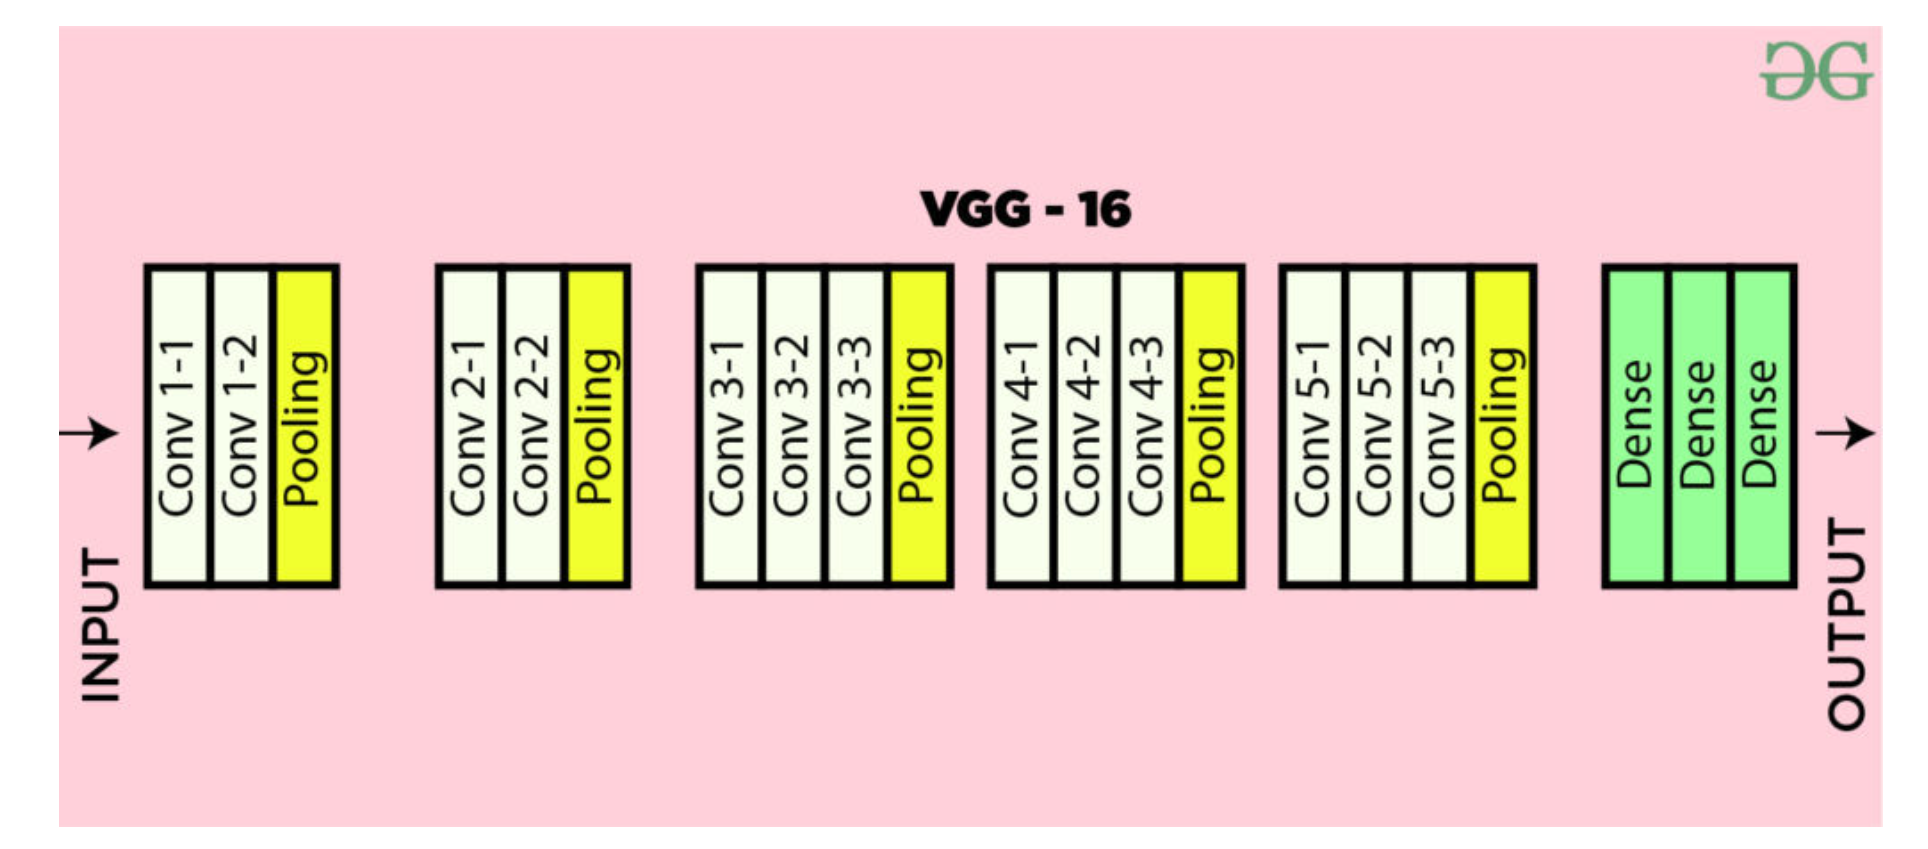

In [ ]:
def create_model_16(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    conv_base = VGG16(include_top=False,
                     weights=None,
                     input_shape=input_shape)
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dense(128, activation='relu')(top_model)
    #top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)


    model = Model(inputs=conv_base.input, outputs=output_layer)
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

### Normal

In [ ]:
from keras.models import Sequential
from keras import layers


In [ ]:
modelF = Sequential()
modelF.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
modelF.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
modelF.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelF.add(layers.MaxPooling2D((2, 2)))
modelF.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelF.add(layers.MaxPooling2D((2, 2)))
modelF.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelF.add(layers.MaxPooling2D((2, 2)))
modelF.add(layers.Flatten())
modelF.add(layers.Dense(64, activation='relu'))
modelF.add(layers.Dense(12, activation='softmax'))
modelF.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Training

In [ ]:
vgg_history_normal = vgg_model.fit(traingen_normal,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_normal,
                            verbose=1)


NameError: ignored

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = vgg_model.evaluate_generator(testgen_normal, steps=testgen_normal.n // testgen_normal.batch_size)
test_preds = np.argmax(vgg_model.predict(testgen_normal), axis=-1)
test_labels = testgen_normal.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {vgg_history_normal.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Sharpened

In [ ]:
vgg_model = create_model_16(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
vgg_history_sharpened = vgg_model.fit(traingen_sharpened,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_sharpened,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = vgg_model.evaluate_generator(testgen_sharpened, steps=testgen_sharpened.n // testgen_sharpened.batch_size)
test_preds = np.argmax(vgg_model.predict(testgen_sharpened), axis=-1)
test_labels = testgen_sharpened.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {vgg_history_sharpened.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Thresholded

In [ ]:
vgg_model = create_model_16(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
vgg_history_thresholded = vgg_model.fit(traingen_threshold,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_threshold,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = vgg_model.evaluate_generator(testgen_threshold, steps=testgen_threshold.n // testgen_threshold.batch_size)
test_preds = np.argmax(vgg_model.predict(testgen_threshold), axis=-1)
test_labels = testgen_threshold.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {vgg_history_thresholded.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Adaptive Thresholded

In [ ]:
vgg_model = create_model_16(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
vgg_history_adaptive = vgg_model.fit(traingen_adaptive,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_adaptive,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = vgg_model.evaluate_generator(testgen_adaptive, steps=testgen_adaptive.n // testgen_adaptive.batch_size)
test_preds = np.argmax(vgg_model.predict(testgen_adaptive), axis=-1)
test_labels = testgen_adaptive.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {vgg_history_adaptive.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Gaussian Blur

In [ ]:
vgg_model = create_model_16(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
vgg_history_gaussian = vgg_model.fit(traingen_gaussian,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_gaussian,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = vgg_model.evaluate_generator(testgen_gaussian, steps=testgen_gaussian.n // testgen_gaussian.batch_size)
test_preds = np.argmax(vgg_model.predict(testgen_gaussian), axis=-1)
test_labels = testgen_gaussian.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {vgg_history_gaussian.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Comparing the accuracies of All Techniques

In [ ]:
import matplotlib.pyplot as plt

histories = [vgg_history_normal, vgg_history_sharpened, vgg_history_thresholded, vgg_history_adaptive, vgg_history_gaussian]
model_names = ['Normal', 'Sharpened', 'Thresholded','Adaptive', 'Gaussian Blur']

plt.figure(figsize=(10, 6))

for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.title('Model Accuracy Comparison for VGG-16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

histories = [vgg_history_normal, vgg_history_sharpened, vgg_history_thresholded, vgg_history_adaptive, vgg_history_gaussian]
model_names = ['Normal', 'Sharpened', 'Thresholded','Adaptive', 'Gaussian Blur']

plt.figure(figsize=(10, 6))

for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=model_names[i])

plt.title('Model Accuracy Comparison for VGG-16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 2. Fitting the Datasets to VGG-19

In [ ]:
from keras.applications.vgg19 import VGG19

def create_model_19(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    conv_base = VGG19(include_top=False,
                      weights='imagenet',
                      input_shape=input_shape)
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs=conv_base.input, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Normal

In [ ]:
vgg_model_19 = create_model_19(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
vgg_history_normal_19 = vgg_model_19.fit(traingen_normal,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_normal,
                            verbose=1)


In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = vgg_model_19.evaluate_generator(testgen_normal, steps=testgen_normal.n // testgen_normal.batch_size)
test_preds = np.argmax(vgg_model_19.predict(testgen_normal), axis=-1)
test_labels = testgen_normal.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {vgg_history_normal_19.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Sharpened

In [ ]:
vgg_model_19 = create_model_19(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
vgg_history_sharpened_19 = vgg_model_19.fit(traingen_sharpened,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_sharpened,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = vgg_model_19.evaluate_generator(testgen_sharpened, steps=testgen_sharpened.n // testgen_sharpened.batch_size)
test_preds = np.argmax(vgg_model_19.predict(testgen_sharpened), axis=-1)
test_labels = testgen_sharpened.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {vgg_history_sharpened_19.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Thresholded

In [ ]:
vgg_model_19 = create_model_19(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
vgg_history_thresholded_19 = vgg_model_19.fit(traingen_threshold,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_threshold,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = vgg_model_19.evaluate_generator(testgen_threshold, steps=testgen_threshold.n // testgen_threshold.batch_size)
test_preds = np.argmax(vgg_model_19.predict(testgen_threshold), axis=-1)
test_labels = testgen_threshold.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {vgg_history_thresholded_19.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Adaptive Thresholded

In [ ]:
vgg_model_19 = create_model_19(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
vgg_history_adaptive_19 = vgg_model_19.fit(traingen_adaptive,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_adaptive,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = vgg_model_19.evaluate_generator(testgen_adaptive, steps=testgen_adaptive.n // testgen_adaptive.batch_size)
test_preds = np.argmax(vgg_model_19.predict(testgen_adaptive), axis=-1)
test_labels = testgen_adaptive.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {vgg_history_adaptive_19.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Gaussian Blur

In [ ]:
vgg_model_19 = create_model_19(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
vgg_history_gaussian_19 = vgg_model_19.fit(traingen_gaussian,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_gaussian,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = vgg_model_19.evaluate_generator(testgen_gaussian, steps=testgen_gaussian.n // testgen_gaussian.batch_size)
test_preds = np.argmax(vgg_model_19.predict(testgen_gaussian), axis=-1)
test_labels = testgen_gaussian.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {vgg_history_gaussian_19.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

## Comparing Performance

In [ ]:
import matplotlib.pyplot as plt

histories = [vgg_history_normal_19, vgg_history_sharpened_19, vgg_history_thresholded_19, vgg_history_adaptive_19, vgg_history_gaussian_19]
model_names = ['Normal', 'Sharpened', 'Thresholded','Adaptive', 'Gaussian Blur']

plt.figure(figsize=(10, 6))

for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.title('Model Accuracy Comparison for VGG-19')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

histories = [vgg_history_normal_19, vgg_history_sharpened_19, vgg_history_thresholded_19, vgg_history_adaptive_19, vgg_history_gaussian_19]
model_names = ['Normal', 'Sharpened', 'Thresholded','Adaptive', 'Gaussian Blur']

plt.figure(figsize=(10, 6))

for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=model_names[i])

plt.title('Model Validation Accuracy Comparison for VGG-19')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. Fitting the Datasets to ResNet-101

IP size - 224x224
ResNet (Residual Network) is a convolutional neural network that democratized the concepts of residual learning and skip connections. This enables to train much deeper models.

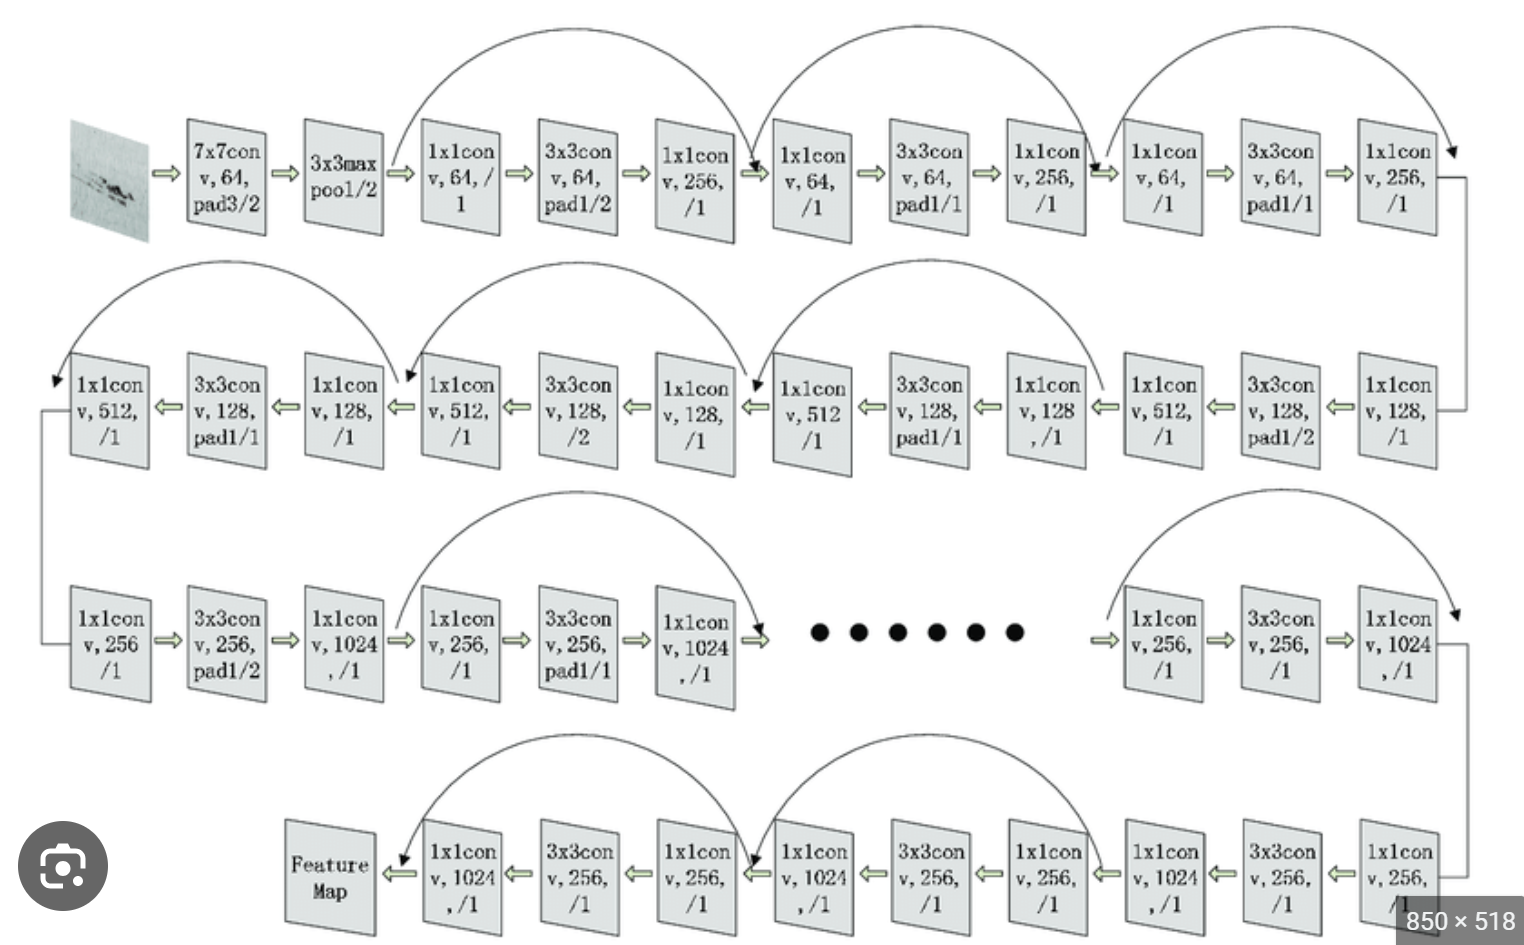

In [ ]:
from keras.applications.resnet import ResNet101

def create_model_101(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    conv_base = ResNet101(include_top=False,
                          weights='imagenet',
                          input_shape=input_shape)
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs=conv_base.input, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Normal

In [ ]:
resnet = create_model_101(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
resnet_history_normal = resnet.fit(traingen_normal,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_normal,
                            verbose=1)


In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = resnet.evaluate_generator(testgen_normal, steps=testgen_normal.n // testgen_normal.batch_size)
test_preds = np.argmax(resnet.predict(testgen_normal), axis=-1)
test_labels = testgen_normal.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {resnet_history_normal.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Sharpened

In [ ]:
resnet = create_model_101(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
resnet_history_sharpened = resnet.fit(traingen_sharpened,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_sharpened,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = resnet.evaluate_generator(testgen_sharpened, steps=testgen_sharpened.n // testgen_sharpened.batch_size)
test_preds = np.argmax(resnet.predict(testgen_sharpened), axis=-1)
test_labels = testgen_sharpened.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {resnet_history_sharpened.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Thresholded

In [ ]:
resnet = create_model_101(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
resnet_history_thresholded = resnet.fit(traingen_threshold,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_threshold,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = resnet.evaluate_generator(testgen_threshold, steps=testgen_threshold.n // testgen_threshold.batch_size)
test_preds = np.argmax(resnet.predict(testgen_threshold), axis=-1)
test_labels = testgen_threshold.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {resnet_history_thresholded.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Adaptive Thresholded

In [ ]:
resnet = create_model_101(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
resnet_history_adaptive = resnet.fit(traingen_adaptive,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_adaptive,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = resnet.evaluate_generator(testgen_adaptive, steps=testgen_adaptive.n // testgen_adaptive.batch_size)
test_preds = np.argmax(resnet.predict(testgen_adaptive), axis=-1)
test_labels = testgen_adaptive.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {resnet_history_adaptive.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Gaussian Blur

In [ ]:
resnet = create_model_101(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
resnet_history_gaussian = resnet.fit(traingen_gaussian,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_gaussian,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = resnet.evaluate_generator(testgen_gaussian, steps=testgen_gaussian.n // testgen_gaussian.batch_size)
test_preds = np.argmax(resnet.predict(testgen_gaussian), axis=-1)
test_labels = testgen_gaussian.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {resnet_history_gaussian.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

# Comparision

In [ ]:
import matplotlib.pyplot as plt

histories = [resnet_history_normal, resnet_history_sharpened, resnet_history_thresholded, resnet_history_adaptive, resnet_history_gaussian]
model_names = ['Normal', 'Sharpened', 'Thresholded','Adaptive Thresholded', 'Gaussian Blur']

plt.figure(figsize=(10, 6))

for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.title('Model Accuracy Comparison for ResNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

histories = [resnet_history_normal, resnet_history_sharpened, resnet_history_thresholded, resnet_history_adaptive, resnet_history_gaussian]
model_names = ['Normal', 'Sharpened', 'Thresholded','Adaptive Thresholded', 'Gaussian Blur']

plt.figure(figsize=(10, 6))

for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=model_names[i])

plt.title('Model Validation Accuracy Comparison for ResNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 4. Fitting the Datasets to EfficientNetB0

In [ ]:
from keras.applications.efficientnet import EfficientNetB0

def create_model_efficientnetB0(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    conv_base = EfficientNetB0(include_top=False,
                               weights='imagenet',
                               input_shape=input_shape)
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs=conv_base.input, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
efficientnetB0 = create_model_efficientnetB0(input_shape, n_classes, optim_1, fine_tune=0)

### Normal

In [ ]:
eff_history_normal = efficientnetB0.fit(traingen_normal,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_normal,
                            verbose=1)


In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = efficientnetB0.evaluate_generator(testgen_normal, steps=testgen_normal.n // testgen_normal.batch_size)
test_preds = np.argmax(efficientnetB0.predict(testgen_normal), axis=-1)
test_labels = testgen_normal.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {eff_history_normal.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Sharpened

In [ ]:
efficientnetB0 = create_model_efficientnetB0(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
eff_history_sharpened = efficientnetB0.fit(traingen_sharpened,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_sharpened,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = efficientnetB0.evaluate_generator(testgen_sharpened, steps=testgen_sharpened.n // testgen_sharpened.batch_size)
test_preds = np.argmax(efficientnetB0.predict(testgen_sharpened), axis=-1)
test_labels = testgen_sharpened.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {eff_history_sharpened.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Thresholded

In [ ]:
efficientnetB0 = create_model_efficientnetB0(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
eff_history_thresholded = efficientnetB0.fit(traingen_threshold,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_threshold,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = efficientnetB0.evaluate_generator(testgen_threshold, steps=testgen_threshold.n // testgen_threshold.batch_size)
test_preds = np.argmax(efficientnetB0.predict(testgen_threshold), axis=-1)
test_labels = testgen_threshold.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {eff_history_thresholded.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Adaptive Thresholded

In [ ]:
efficientnetB0 = create_model_efficientnetB0(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
eff_history_adaptive = efficientnetB0.fit(traingen_adaptive,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_adaptive,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = efficientnetB0.evaluate_generator(testgen_adaptive, steps=testgen_adaptive.n // testgen_adaptive.batch_size)
test_preds = np.argmax(efficientnetB0.predict(testgen_adaptive), axis=-1)
test_labels = testgen_adaptive.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {eff_history_adaptive.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

### Gaussian Blur

In [ ]:
efficientnetB0 = create_model_efficientnetB0(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
eff_history_gaussian = efficientnetB0.fit(traingen_gaussian,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=validgen_gaussian,
                            verbose=1)

In [ ]:
# Make predictions on the test data and calculate precision and recall
test_loss, test_acc = efficientnetB0.evaluate_generator(testgen_gaussian, steps=testgen_gaussian.n // testgen_gaussian.batch_size)
test_preds = np.argmax(efficientnetB0.predict(testgen_gaussian), axis=-1)
test_labels = testgen_gaussian.classes
precision = precision_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")
f1 = f1_score(test_labels, test_preds, average="weighted")

In [ ]:
# Print the testing and validation accuracy, precision, and recall
print(f"Testing accuracy: {test_acc}")
print(f"Validation accuracy: {eff_history_gaussian.history['val_accuracy'][-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

In [ ]:
cm = confusion_matrix(test_labels, test_preds)
print(cm)

## Comparision

In [ ]:
import matplotlib.pyplot as plt

# histories = [eff_history_normal, eff_history_sharpened, eff_history_thresholded, eff_history_adaptive, eff_history_gaussian]
# model_names = ['Normal', 'Sharpened', 'Thresholded','Adaptive Thresholded', 'Gaussian Blur']

histories = [eff_history_normal, eff_history_sharpened, eff_history_thresholded,eff_history_adaptive, eff_history_gaussian]
model_names = ['Normal', 'Sharpened', 'Thresholded','Adaptive Thresholded', 'Gaussian Blur']

plt.figure(figsize=(10, 6))

for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.title('Model Accuracy Comparison for EfficientNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt



histories = [eff_history_normal, eff_history_sharpened, eff_history_thresholded,eff_history_adaptive, eff_history_gaussian]
model_names = ['Normal', 'Sharpened', 'Thresholded','Adaptive Thresholded', 'Gaussian Blur']

plt.figure(figsize=(10, 6))

for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=model_names[i])

plt.title('Model Validation Accuracy Comparison for EfficientNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()